# Q1. What is the purpose of grid search cv in machine learning, and how does it work?


Grid Search Cross-Validation (Grid Search CV) is a technique used in machine learning to find the best hyperparameters for a model. The goal is to optimize model performance by systematically evaluating different combinations of hyperparameters and selecting the combination that yields the best results according to a specified metric.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
data = load_iris()
X, y = data.data, data.target

# Define the model
model = LogisticRegression(solver='liblinear')

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Initialize Grid Search CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit Grid Search CV
grid_search.fit(X, y)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Print classification report
print(classification_report(y, y_pred))


Best Parameters: {'C': 10, 'penalty': 'l1'}
Best Score: 0.9800000000000001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



Grid Search CV
Description:
    

Systematic Search: Grid Search CV evaluates all possible combinations of specified hyperparameters. It performs an exhaustive search over the defined parameter grid.
Parameters: You provide a fixed set of hyperparameter values, and Grid Search CV will evaluate every combination of these values.
Advantages:

Comprehensive: Ensures that all specified combinations are evaluated, so you might find the optimal set of hyperparameters if the grid is well-chosen.
Deterministic: The results are deterministic, meaning that given the same grid and data, it will always return the same results.
Disadvantages:

Computationally Expensive: Evaluates all possible combinations, which can be time-consuming and resource-intensive, especially with large datasets or a large number of hyperparameter combinations.
Fixed Grid: Requires you to specify the grid beforehand, which might lead to missing the optimal parameters if the grid is not well-chosen.
When to Use:

When the hyperparameter space is small to moderate.
When you need a comprehensive search over the parameter space and have sufficient computational resources.





Randomized Search CV
Description:

Probabilistic Search: Randomized Search CV evaluates a random subset of hyperparameter combinations. Instead of evaluating all possible combinations, it samples a specified number of parameter settings from the defined distributions.
Parameters: You specify distributions or ranges for each hyperparameter, and Randomized Search CV randomly samples from these distributions.
Advantages:

Less Computationally Intensive: Can be more efficient because it evaluates a subset of the parameter space, which can lead to faster results.
Flexible: Allows for more flexibility in exploring a wide range of hyperparameter values without needing a fixed grid.
Disadvantages:

Less Exhaustive: Since it evaluates a random subset, there’s no guarantee that the optimal hyperparameters will be found, especially if the number of iterations is too low.
Non-Deterministic: Results can vary between runs because of the random sampling process.
When to Use:

When the hyperparameter space is large and exhaustive search is computationally prohibitive.
When you want to explore a broad range of hyperparameter values with limited computational resources.
When you want to balance between finding good hyperparameters and computational efficiency.

# Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.


Data Leakage is a critical issue in machine learning where information from outside the training dataset is used to create the model. This can lead to overly optimistic performance estimates during training and evaluation, which ultimately undermines the model's ability to generalize to new, unseen data.

Why Data Leakage is a Problem
Overestimation of Model Performance: Data leakage can cause the model to perform exceptionally well during training and validation because it has had access to information it would not have in a real-world scenario. This leads to misleadingly high accuracy, precision, or other performance metrics.

Poor Generalization: If the model is trained on data that includes information from the test set or future data, it may not generalize well to new, unseen data. The model essentially learns patterns that are not present in real-world situations.

Misleading Results: Data leakage can make it difficult to accurately assess the model's true performance, which affects decision-making and can lead to the deployment of models that perform poorly in practice.

Example of Data Leakage
Scenario: Suppose you are building a predictive model to forecast customer churn based on historical data. The dataset includes a feature called customer_churn which indicates whether the customer has churned or not. This feature is included in your training data, but it should be a result of the prediction, not an input.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create a hypothetical dataset
data = pd.DataFrame({
    'age': [25, 30, 35, 40, 45],
    'monthly_charge': [70, 80, 90, 100, 110],
    'customer_churn': [0, 1, 0, 1, 1]  # Target variable, should not be used as a feature
})

# Attempt to use the target variable 'customer_churn' as a feature (data leakage)
X = data[['age', 'monthly_charge', 'customer_churn']]
y = data['customer_churn']

# Split the data (note: this is just for illustration; in practice, the target should not be a feature)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

# Q4. How can you prevent data leakage when building a machine learning model?


To prevent data leakage:

Split Data Properly: Always separate training and test sets before preprocessing.

Feature Engineering: Perform feature engineering separately on training and test data.

Cross-Validation: Use proper cross-validation techniques without including test data in training folds.

Pipeline Use: Employ pipelines to handle preprocessing and modeling consistently.

Feature Selection: Fit feature selection on training data only.

Respect Temporal Order: For time-series data, maintain chronological order.

Ensure Data Source Independence: Be cautious with external data sources to avoid leakage.

# Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?


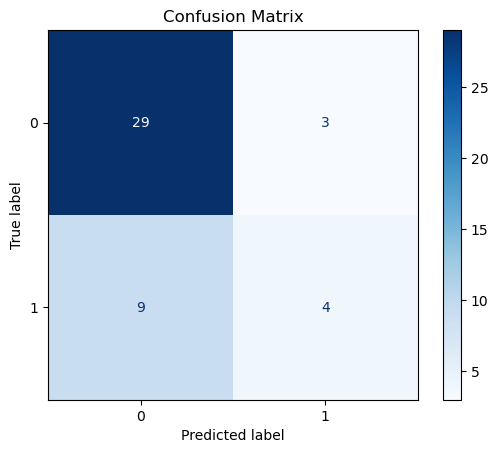

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.57      0.31      0.40        13

    accuracy                           0.73        45
   macro avg       0.67      0.61      0.61        45
weighted avg       0.71      0.73      0.70        45



In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load dataset
data = load_iris()
X = data.data
y = data.target
y_binary = (y == 1).astype(int)  # Convert to binary classification

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


A confusion matrix is a table used to evaluate the performance of a classification model. It summarizes the predictions made by the model compared to the actual outcomes. For a binary classification problem, the confusion matrix has four components:

True Positives (TP): The number of instances correctly classified as the positive class.

True Negatives (TN): The number of instances correctly classified as the negative class.

False Positives (FP): The number of instances incorrectly classified as the positive class.

False Negatives (FN): The number of instances incorrectly classified as the negative class.

 Interpreting a Confusion Matrix
To determine the types of errors your model is making:

High False Positives: Indicates that the model is predicting positive cases too often, which might be problematic in cases where false positives have significant consequences (e.g., fraud detection).
High False Negatives: Indicates that the model is missing many positive cases, which can be critical in situations where failing to identify positive cases is harmful (e.g., medical diagnoses).

# Explain the difference between precision and recall in the context of a confusion matrix

 Difference Between Precision and Recall
    
    
Precision:
    
    Measures the accuracy of positive predictions. It is the ratio of correctly predicted positive observations to the total predicted positives
    
Recall (Sensitivity or True Positive Rate): 
    
    Measures how well the model identifies positive observations. It is the ratio of correctly predicted positive observations to all actual positives.

# Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?


False Positives (FP) and False Negatives (FN) help you understand the types of errors your model is making.

True Positives (TP) and True Negatives (TN) indicate successful predictions.

Analyzing the confusion matrix helps identify class imbalance, precision-recall trade-offs, and specific errors in class identification.

Use these insights to refine the model, adjust thresholds, or address class imbalance to improve overall performance.

# Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?


Accuracy: Overall performance of the model.

Precision: Quality of positive predictions.

Recall: Ability to find all positive cases.

F1 Score: Balance between precision and recall.

Specificity: Ability to identify negative cases.

False Positive Rate (FPR): How often negatives are incorrectly predicted as positives.

False Negative Rate (FNR): How often positives are incorrectly predicted as negatives.

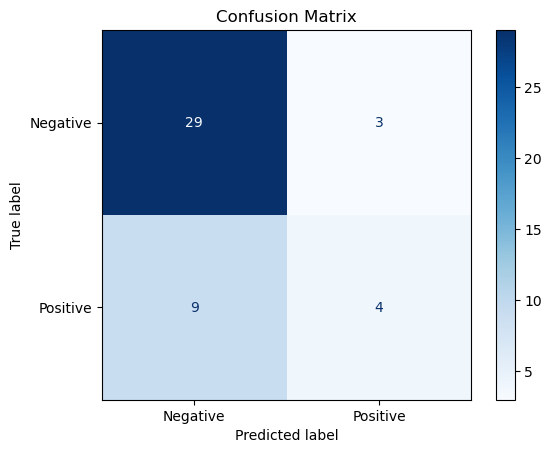

Confusion Matrix:
[[29  3]
 [ 9  4]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.91      0.83        32
    Positive       0.57      0.31      0.40        13

    accuracy                           0.73        45
   macro avg       0.67      0.61      0.61        45
weighted avg       0.71      0.73      0.70        45


Metrics:
Accuracy: 0.7333
Precision: 0.5714
Recall: 0.3077
F1 Score: 0.4000
Specificity: 0.9062
False Positive Rate (FPR): 0.0938
False Negative Rate (FNR): 0.6923


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Convert to binary classification for demonstration (e.g., class 1 vs. all others)
y_binary = (y == 1).astype(int)  # Binary classification: class 1 vs. not class 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate metrics
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
fpr = FP / (TN + FP) if (TN + FP) > 0 else 0
fnr = FN / (TP + FN) if (TP + FN) > 0 else 0

# Print metrics
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))
print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"False Positive Rate (FPR): {fpr:.4f}")
print(f"False Negative Rate (FNR): {fnr:.4f}")


# Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?


Accuracy is a straightforward metric derived from the confusion matrix, representing the proportion of correct predictions out of the total predictions. It is calculated using TP, TN, FP, and FN values. While useful, accuracy should be considered alongside other metrics, especially in cases of class imbalance, to get a comprehensive understanding of model performance.








# Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model


Class Imbalance: Identify if the model is biased towards the majority class.

Model Bias: Detect if the model is favoring or neglecting specific classes.

Overfitting/Underfitting: Analyze performance differences between training and test sets.

Error Analysis: Understand which types of errors are most common and why.

Precision-Recall Trade-offs: Balance precision and recall based on model requirements.

Multi-Class Issues: Check for confusion between specific classes.

Using the confusion matrix and these techniques will help you diagnose and address various issues with your machine learning model, leading to more robust and fair performance.